# Import Libraries

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
import sklearn.decomposition as pca

from  sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# set columns show max 25
pd.set_option('display.max_columns', 25)

pca = pca.PCA(n_components=1)

import warnings
warnings.filterwarnings("ignore")

In [183]:
# Standar scaler without Attrition column
attrition = df['Attrition']
df_to_scale = df.drop(columns=['Attrition'])

# Initialize StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_to_scale), columns=df_to_scale.columns)

# Reset index
df_scaled.index = df.index

df_scaled['Attrition'] = attrition

In [181]:
df = pd.read_csv('preprocessed/df.csv')
df.head()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,1,19,0,5390,4,2,3,2,0,22,3,1,0,2,2,89,0,0,0,4,2,1
1,59,0,4,3,5534,1,3,1,3,0,21,4,0,3,2,2,21,0,0,0,2,1,1
2,24,0,10,2,8159,3,3,1,0,0,11,2,1,3,2,2,74,0,0,0,1,1,1
3,36,0,7,0,3989,3,3,4,1,0,27,1,2,2,2,1,50,1,0,0,3,2,1
4,56,1,41,0,4821,2,4,3,0,1,71,1,0,0,3,2,68,0,0,0,2,2,1


<Axes: >

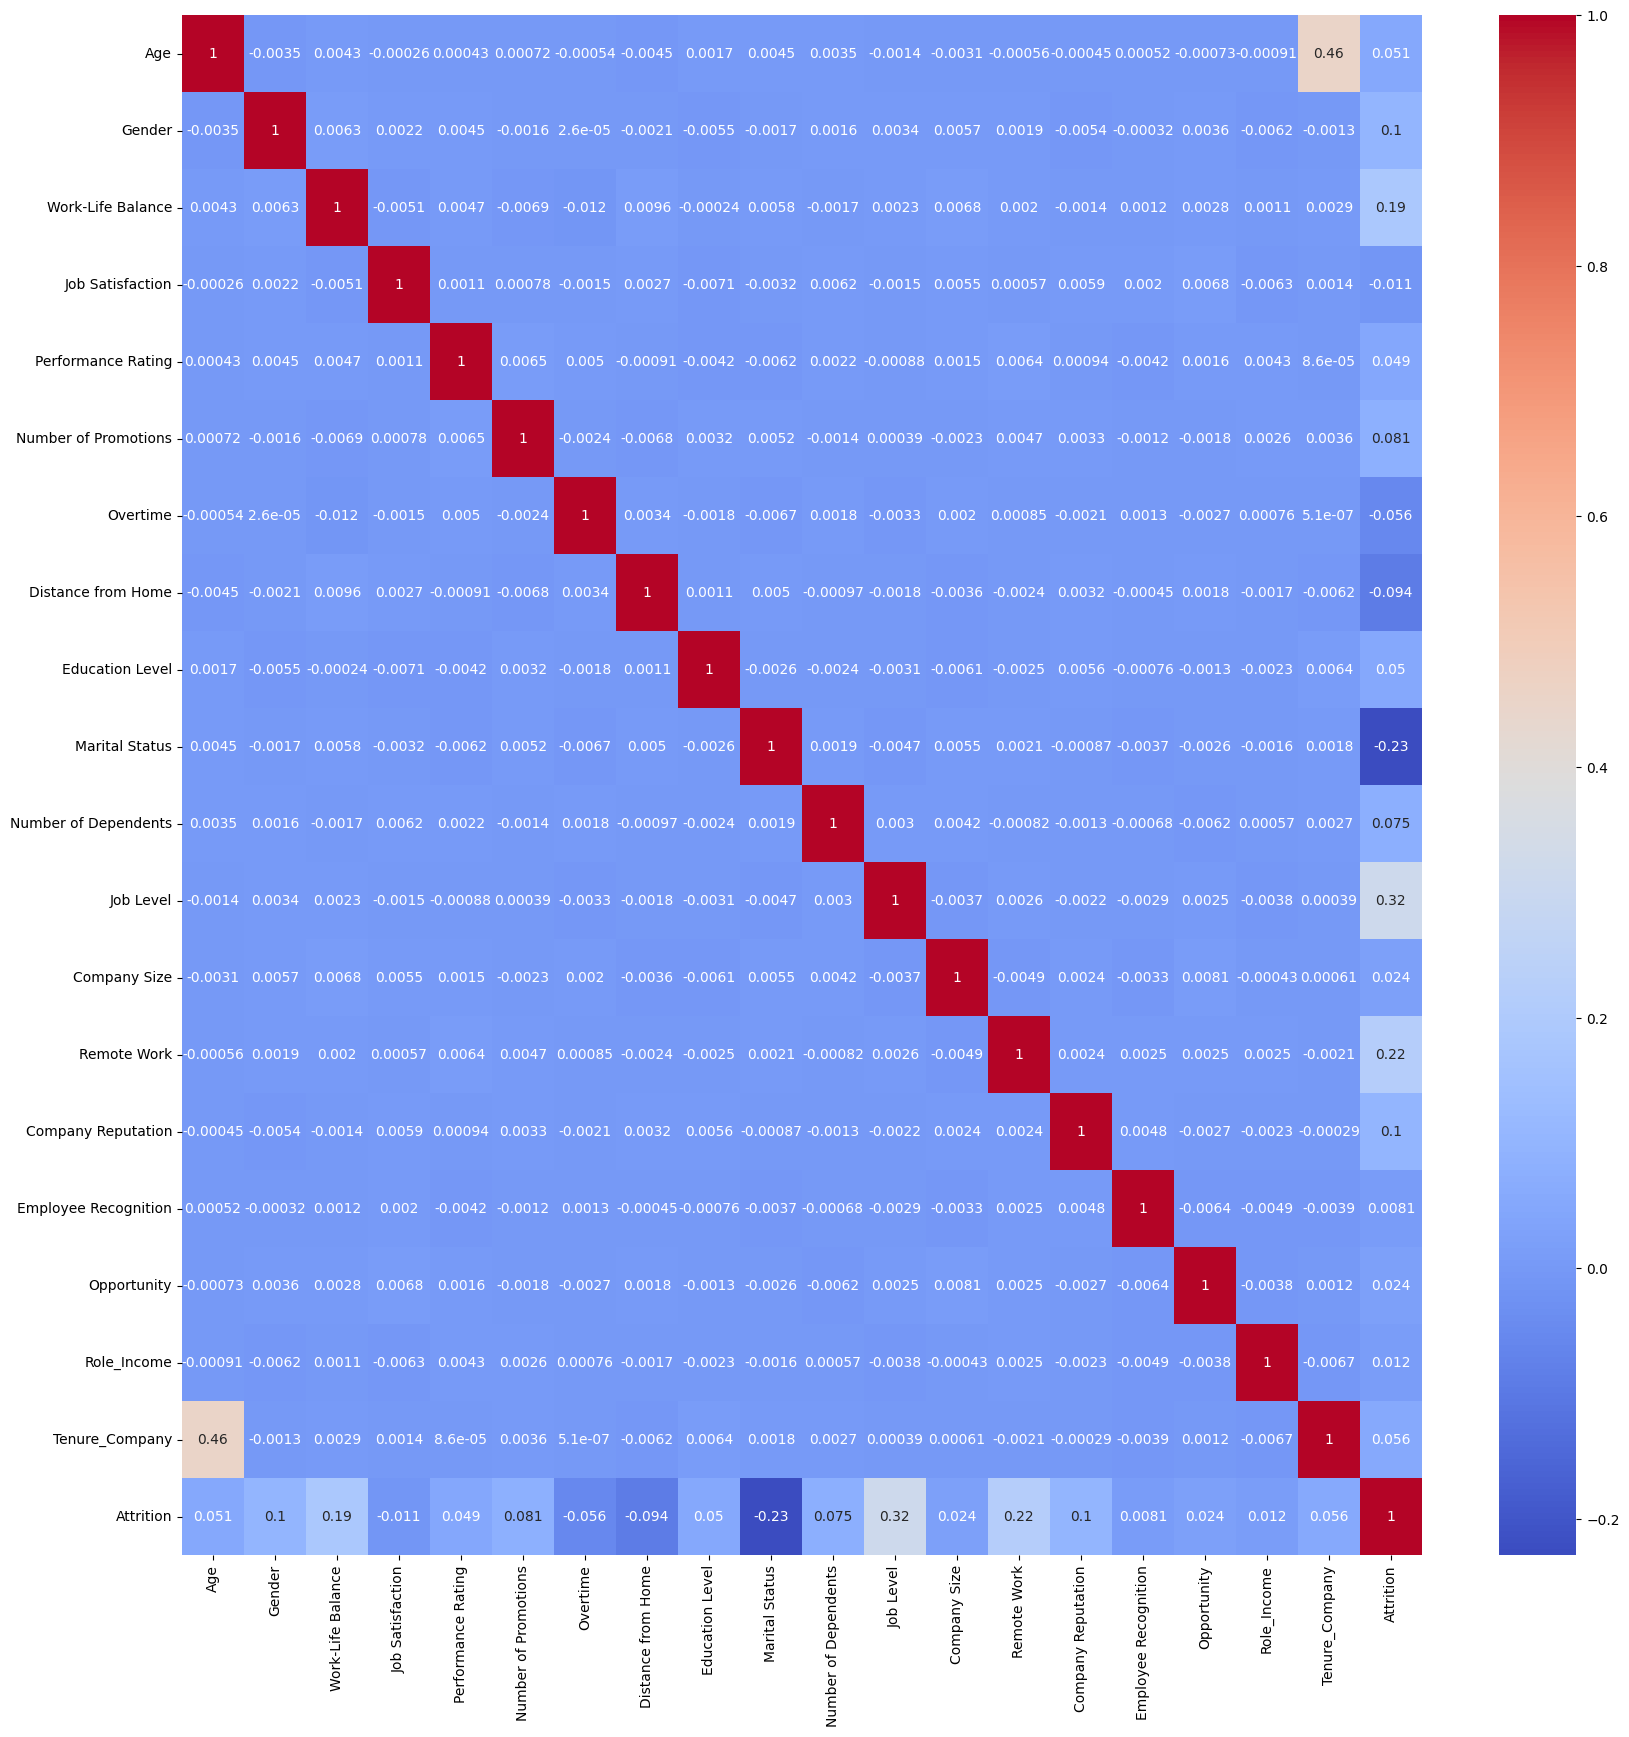

In [190]:
# Heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm')

In [184]:
# PCA on Job Leadership Opportunities and Inovation Opportunities
pca.fit(df_scaled[['Leadership Opportunities', 'Innovation Opportunities']]) 
df_pca = pca.transform(df_scaled[['Leadership Opportunities', 'Innovation Opportunities']])
df_pca = pd.DataFrame(df_pca, columns=['Opportunity'])
df_pca.head()

,Opportunity
0,-0.471907
1,-0.471907
2,-0.471907
3,-0.471907
4,-0.471907


In [185]:
# PCA Job Role and Montly Income

pca.fit(df_scaled[['Job Role', 'Monthly Income']])
df_pca2 = pca.transform(df_scaled[['Job Role', 'Monthly Income']])
df_pca2 = pd.DataFrame(df_pca2, columns=['Role_Income'])
df_pca2.head()

,Role_Income
0,-1.646158
1,-0.157041
2,0.228315
3,-2.108298
4,-1.833851


In [186]:
# PCA Company Tenure and Years at Company
pca.fit(df_scaled[['Company Tenure', 'Years at Company']])
df_pca3 = pca.transform(df_scaled[['Company Tenure', 'Years at Company']])
df_pca3 = pd.DataFrame(df_pca3, columns=['Tenure_Company'])
df_pca3.head()

,Tenure_Company
0,1.132842
1,-1.705231
2,0.148254
3,-0.708890
4,1.934210


In [187]:
# Delete columns
df_scaled = df_scaled.drop(['Leadership Opportunities', 'Innovation Opportunities', 'Job Role', 'Monthly Income', 'Company Tenure', 'Years at Company'], axis=1)

In [188]:
# Combine PCA with the original data
df_scaled = pd.concat([df_scaled, df_pca, df_pca2, df_pca3], axis=1)
# Make attrition as the last column
df_scaled = df_scaled[[c for c in df_scaled if c not in ['Attrition']] + ['Attrition']]
df_scaled.head()

,Age,Gender,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Remote Work,Company Reputation,Employee Recognition,Opportunity,Role_Income,Tenure_Company,Attrition
0,-0.623178,0.908078,1.493622,-0.921920,0.066919,1.172770,-0.696701,-0.981676,0.336557,-0.296040,-1.062278,0.263857,0.142768,-0.485225,1.627514,0.054713,-0.471907,-1.646158,1.132842,1
1,1.694050,-1.101226,-1.705498,0.223677,-2.635719,2.177579,-0.696701,-1.016746,1.199698,-1.774313,0.868640,0.263857,0.142768,-0.485225,-0.535772,-1.035628,-0.471907,-0.157041,-1.705231,1
2,-1.202486,-1.101226,0.427248,0.223677,-2.635719,-0.836848,-0.696701,-1.367445,-0.526584,-0.296040,0.868640,0.263857,0.142768,-0.485225,-1.617414,-1.035628,-0.471907,0.228315,0.148254,1
3,-0.209388,-1.101226,0.427248,0.223677,1.418238,0.167961,-0.696701,-0.806327,-1.389726,1.182233,0.225001,0.263857,-1.285354,2.060899,0.545871,0.054713,-0.471907,-2.108298,-0.708890,1
4,1.445776,0.908078,-0.639125,1.369275,0.066919,-0.836848,1.435336,0.736749,-1.389726,-1.774313,-1.062278,1.597257,0.142768,-0.485225,-0.535772,0.054713,-0.471907,-1.833851,1.934210,1


# Train Test Split

In [191]:
# train test split
X = df_scaled.drop('Attrition', axis=1)
y = df_scaled['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(59546, 19)
(14887, 19)
(59546,)
(14887,)


In [192]:
y_train.value_counts()

Attrition
1    31260
0    28286
Name: count, dtype: int64

In [193]:
# Under sampling
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

In [194]:
y_train_res.value_counts()

Attrition
0    28286
1    28286
Name: count, dtype: int64

In [118]:
# # Scaling the data
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train_res)
# X_test = scaler.transform(X_test)

# Model

**Logistik Regression**

Classification Report: 
               precision    recall  f1-score   support

           0     0.6986    0.7432    0.7202      7051
           1     0.7548    0.7115    0.7325      7836

    accuracy                         0.7265     14887
   macro avg     0.7267    0.7273    0.7263     14887
weighted avg     0.7282    0.7265    0.7267     14887



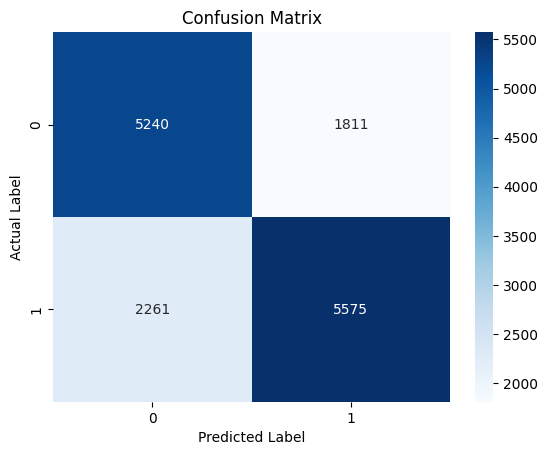

In [196]:
# Logistrik Regression
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)
lg_y_pred = logreg.predict(X_test)

print('Classification Report: \n', classification_report(y_test, lg_y_pred, digits=4))

# Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_test, lg_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

**KNN**

              precision    recall  f1-score   support

           0     0.6643    0.7008    0.6820      7051
           1     0.7167    0.6813    0.6986      7836

    accuracy                         0.6905     14887
   macro avg     0.6905    0.6910    0.6903     14887
weighted avg     0.6919    0.6905    0.6908     14887



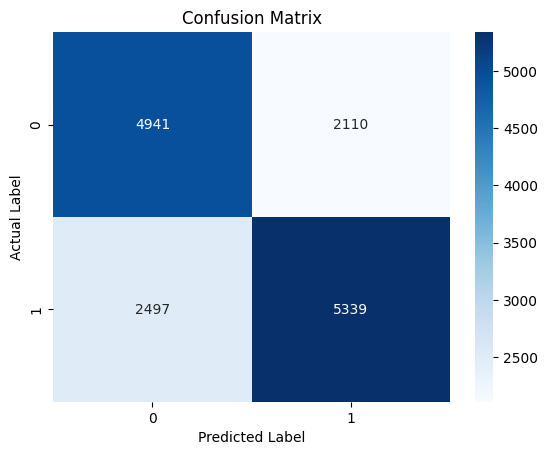

In [197]:
# KNN
knn = KNeighborsClassifier()
knn.fit(X_train_res, y_train_res)
knn_y_pred = knn.predict(X_test)

# Show all the matrix evaluation
print(classification_report(y_test, knn_y_pred, digits=4))

# Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_test, knn_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

**Random Forest**

              precision    recall  f1-score   support

           0     0.7131    0.7650    0.7381      7051
           1     0.7737    0.7231    0.7475      7836

    accuracy                         0.7429     14887
   macro avg     0.7434    0.7440    0.7428     14887
weighted avg     0.7450    0.7429    0.7431     14887



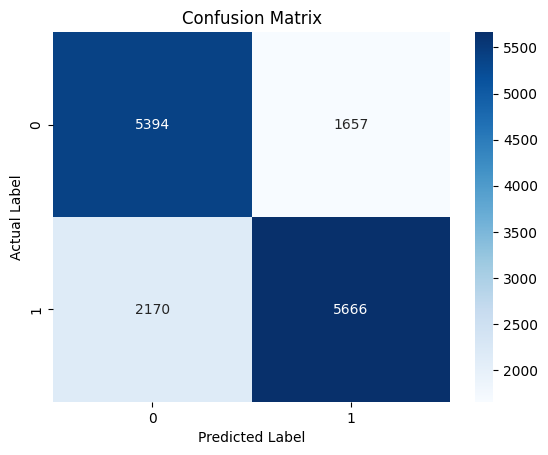

In [198]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_res, y_train_res)
rf_y_pred = rf.predict(X_test)

# Show all the matrix evaluation
print(classification_report(y_test, rf_y_pred, digits=4))

# Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_test, rf_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

           0     0.6495    0.6761    0.6625      7051
           1     0.6974    0.6718    0.6843      7836

    accuracy                         0.6738     14887
   macro avg     0.6735    0.6739    0.6734     14887
weighted avg     0.6747    0.6738    0.6740     14887



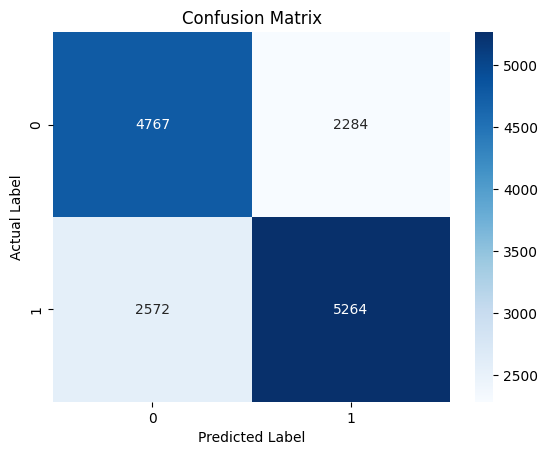

In [203]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train_res, y_train_res)
dt_y_pred = dt.predict(X_test)

# Show all the matrix evaluation
print(classification_report(y_test, dt_y_pred, digits=4))

# Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_test, dt_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

**SVC**

              precision    recall  f1-score   support

           0     0.7158    0.7708    0.7423      7051
           1     0.7784    0.7246    0.7506      7836

    accuracy                         0.7465     14887
   macro avg     0.7471    0.7477    0.7464     14887
weighted avg     0.7488    0.7465    0.7466     14887



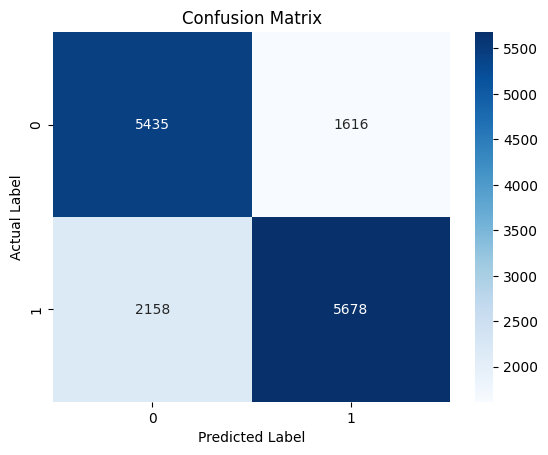

In [199]:
# SVC
svc = SVC()
svc.fit(X_train_res, y_train_res)
svc_y_pred = svc.predict(X_test)

# Show all the matrix evaluation
print(classification_report(y_test, svc_y_pred, digits=4))

# Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_test, svc_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

**Naive Bayes**

              precision    recall  f1-score   support

           0     0.6770    0.7805    0.7250      7051
           1     0.7709    0.6649    0.7140      7836

    accuracy                         0.7196     14887
   macro avg     0.7239    0.7227    0.7195     14887
weighted avg     0.7264    0.7196    0.7192     14887



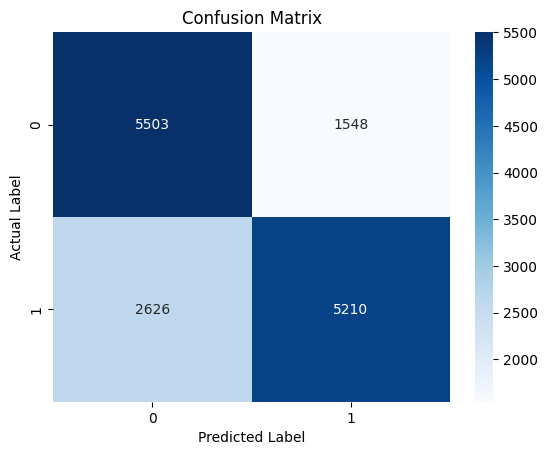

In [200]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train_res, y_train_res)
nb_y_pred = nb.predict(X_test)

# Show all the matrix evaluation
print(classification_report(y_test, nb_y_pred, digits=4))

# Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_test, nb_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

**XGboost**

              precision    recall  f1-score   support

           0     0.7197    0.7599    0.7392      7051
           1     0.7725    0.7337    0.7526      7836

    accuracy                         0.7461     14887
   macro avg     0.7461    0.7468    0.7459     14887
weighted avg     0.7475    0.7461    0.7463     14887



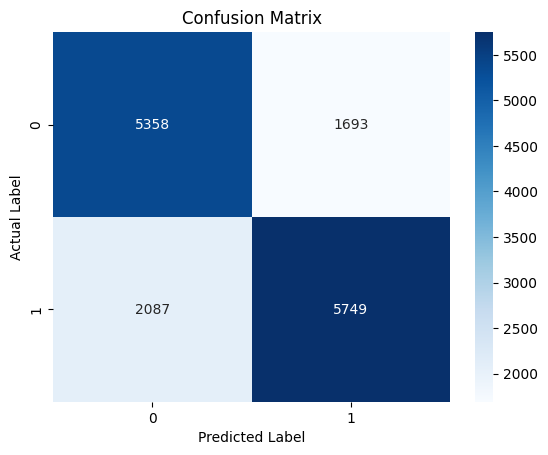

In [201]:
# XGBoost Classifier
xgb = XGBClassifier()
xgb.fit(X_train_res, y_train_res)
xgb_y_pred = xgb.predict(X_test)

# Show all the matrix evaluation
print(classification_report(y_test, xgb_y_pred, digits=4))

# Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_test, xgb_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

**AdaBoost**

              precision    recall  f1-score   support

           0     0.7366    0.7702    0.7531      7051
           1     0.7844    0.7522    0.7679      7836

    accuracy                         0.7607     14887
   macro avg     0.7605    0.7612    0.7605     14887
weighted avg     0.7618    0.7607    0.7609     14887



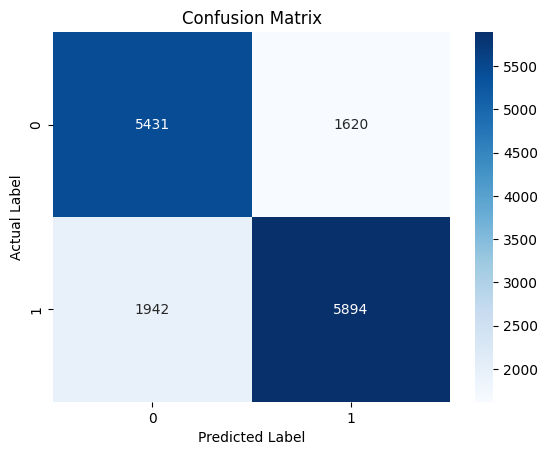

In [202]:
# ADaBoost Classifier
ada = AdaBoostClassifier()
ada.fit(X_train_res, y_train_res)
ada_y_pred = ada.predict(X_test)

# Show all the matrix evaluation
print(classification_report(y_test, ada_y_pred, digits=4))

# Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_test, ada_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

# Visualisasi

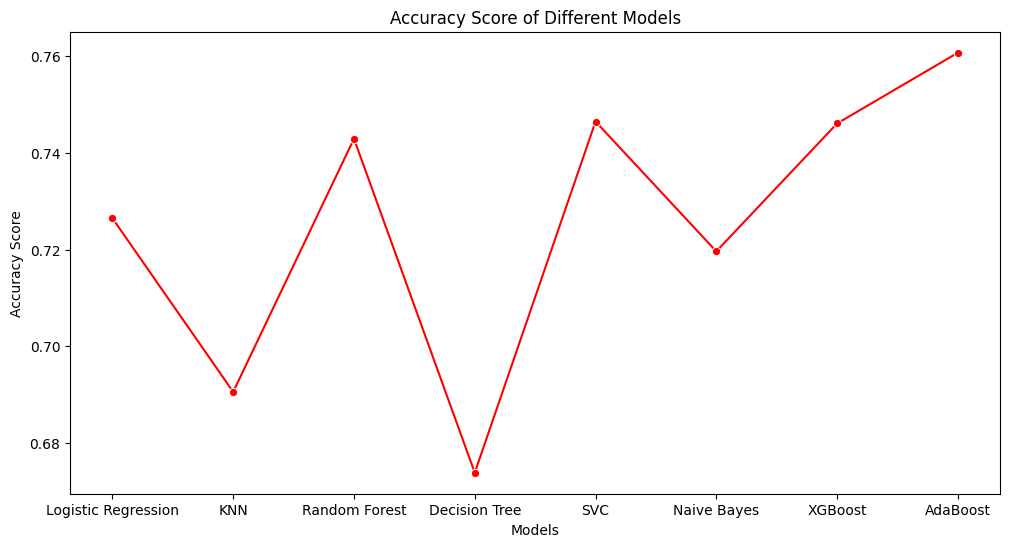

In [205]:
# Plotting the acuracy scores of all the models
import matplotlib.pyplot as plt
import seaborn as sns

models = ['Logistic Regression', 'KNN', 'Random Forest', 'Decision Tree', 'SVC', 'Naive Bayes', 'XGBoost', 'AdaBoost']
accuracy = [accuracy_score(y_test, lg_y_pred), accuracy_score(y_test, knn_y_pred), accuracy_score(y_test, rf_y_pred), accuracy_score(y_test, dt_y_pred), accuracy_score(y_test, svc_y_pred), accuracy_score(y_test, nb_y_pred), accuracy_score(y_test, xgb_y_pred), accuracy_score(y_test, ada_y_pred)]

plt.figure(figsize=(12, 6))
sns.lineplot(x=models, y=accuracy, marker='o', color='red')
plt.title('Accuracy Score of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.show()

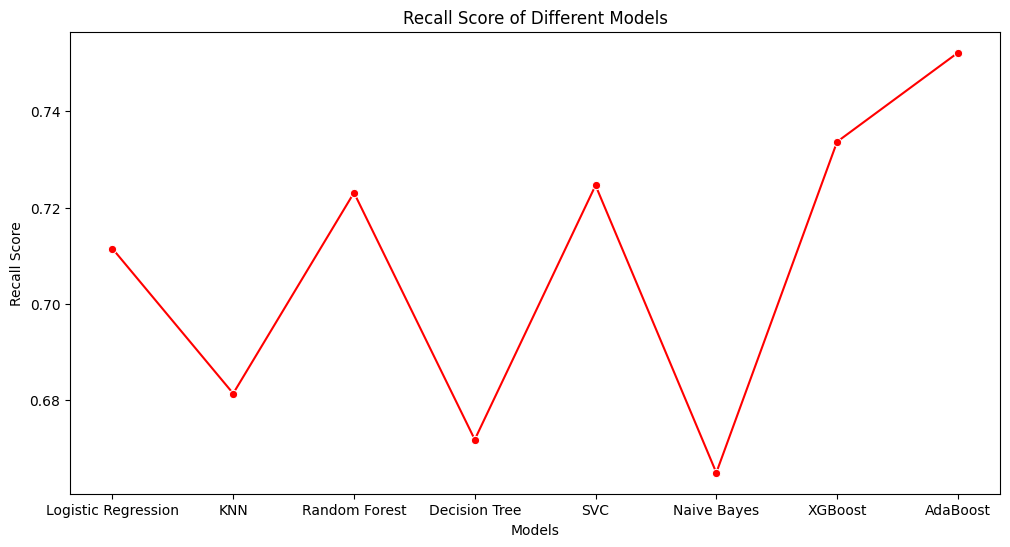

In [206]:
# Plotting the recall scores of all the models
models = ['Logistic Regression', 'KNN', 'Random Forest', 'Decision Tree', 'SVC', 'Naive Bayes', 'XGBoost', 'AdaBoost']
recall = [recall_score(y_test, lg_y_pred), recall_score(y_test, knn_y_pred), recall_score(y_test, rf_y_pred), recall_score(y_test, dt_y_pred), recall_score(y_test, svc_y_pred), recall_score(y_test, nb_y_pred), recall_score(y_test, xgb_y_pred), recall_score(y_test, ada_y_pred)]

plt.figure(figsize=(12, 6))
sns.lineplot(x=models, y=recall, marker='o', color='red')
plt.title('Recall Score of Different Models')
plt.xlabel('Models')
plt.ylabel('Recall Score')
plt.show()

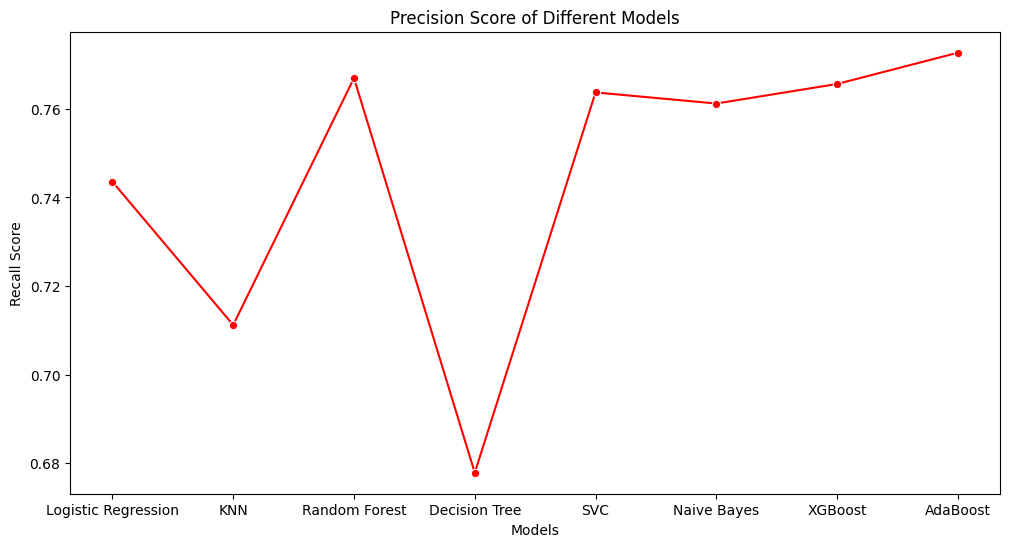

In [ ]:
# Plotting the precision scores of all the models
models = ['Logistic Regression', 'KNN', 'Random Forest', 'Decision Tree', 'SVC', 'Naive Bayes', 'XGBoost', 'AdaBoost']
recall = [precision_score(y_test, lg_y_pred), precision_score(y_test, knn_y_pred), precision_score(y_test, rf_y_pred), precision_score(y_test, dt_y_pred), precision_score(y_test, svc_y_pred), precision_score(y_test, nb_y_pred), precision_score(y_test, xgb_y_pred), precision_score(y_test, ada_y_pred)]

plt.figure(figsize=(12, 6))
sns.lineplot(x=models, y=recall, marker='o', color='red')
plt.title('Precision Score of Different Models')
plt.xlabel('Models')
plt.ylabel('Recall Score')
plt.show()

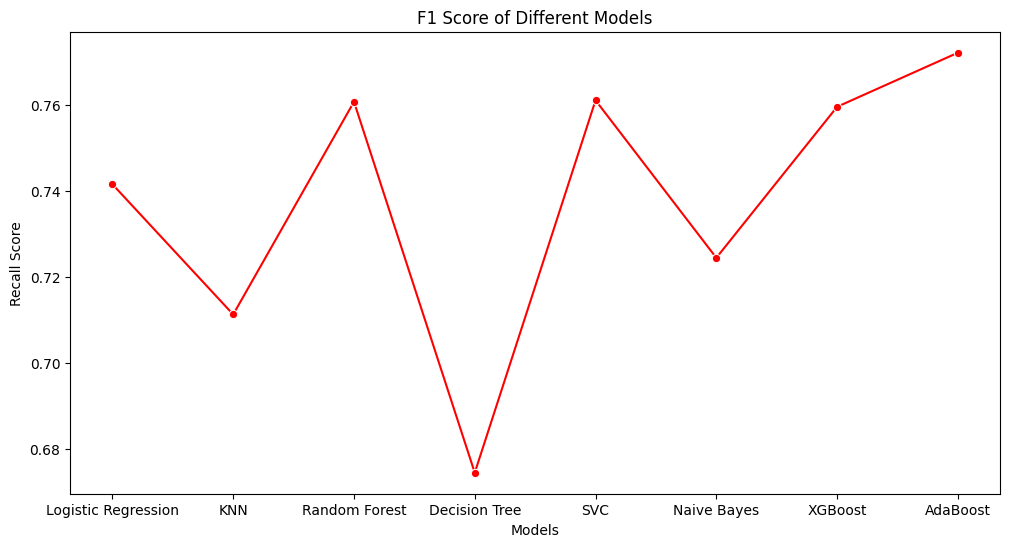

In [ ]:
# Plotting the f1 scores of all the models
models = ['Logistic Regression', 'KNN', 'Random Forest', 'Decision Tree', 'SVC', 'Naive Bayes', 'XGBoost', 'AdaBoost']
recall = [f1_score(y_test, lg_y_pred), f1_score(y_test, knn_y_pred), f1_score(y_test, rf_y_pred), f1_score(y_test, dt_y_pred), f1_score(y_test, svc_y_pred), f1_score(y_test, nb_y_pred), f1_score(y_test, xgb_y_pred), f1_score(y_test, ada_y_pred)]

plt.figure(figsize=(12, 6))
sns.lineplot(x=models, y=recall, marker='o', color='red')
plt.title('F1 Score of Different Models')
plt.xlabel('Models')
plt.ylabel('Recall Score')
plt.show()

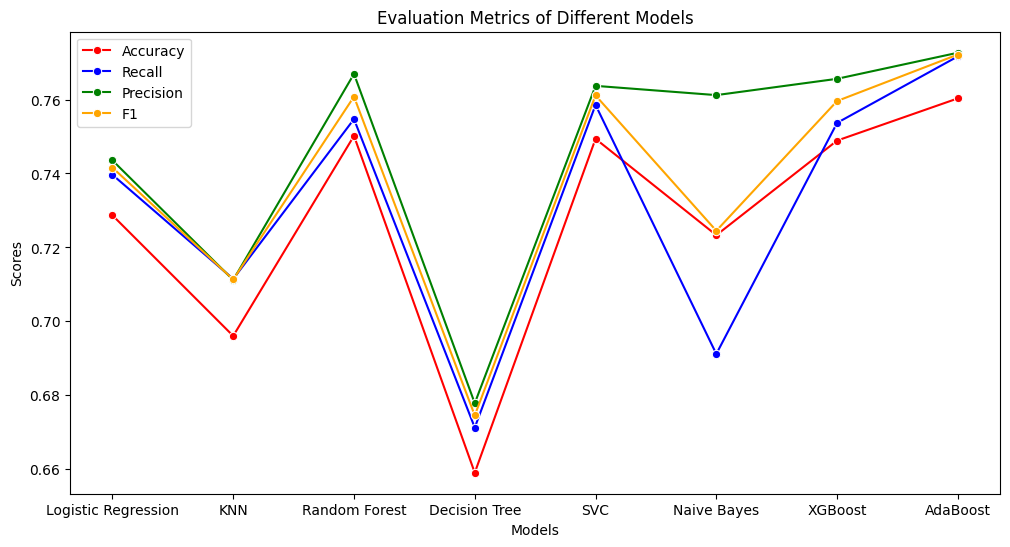

In [ ]:
# plot all model all evaluation on one plot
models = ['Logistic Regression', 'KNN', 'Random Forest', 'Decision Tree', 'SVC', 'Naive Bayes', 'XGBoost', 'AdaBoost']
accuracy = [accuracy_score(y_test, lg_y_pred), accuracy_score(y_test, knn_y_pred), accuracy_score(y_test, rf_y_pred), accuracy_score(y_test, dt_y_pred), accuracy_score(y_test, svc_y_pred), accuracy_score(y_test, nb_y_pred), accuracy_score(y_test, xgb_y_pred), accuracy_score(y_test, ada_y_pred)]
recall = [recall_score(y_test, lg_y_pred), recall_score(y_test, knn_y_pred), recall_score(y_test, rf_y_pred), recall_score(y_test, dt_y_pred), recall_score(y_test, svc_y_pred), recall_score(y_test, nb_y_pred), recall_score(y_test, xgb_y_pred), recall_score(y_test, ada_y_pred)]
precision = [precision_score(y_test, lg_y_pred), precision_score(y_test, knn_y_pred), precision_score(y_test, rf_y_pred), precision_score(y_test, dt_y_pred), precision_score(y_test, svc_y_pred), precision_score(y_test, nb_y_pred), precision_score(y_test, xgb_y_pred), precision_score(y_test, ada_y_pred)]
f1 = [f1_score(y_test, lg_y_pred), f1_score(y_test, knn_y_pred), f1_score(y_test, rf_y_pred), f1_score(y_test, dt_y_pred), f1_score(y_test, svc_y_pred), f1_score(y_test, nb_y_pred), f1_score(y_test, xgb_y_pred), f1_score(y_test, ada_y_pred)]

plt.figure(figsize=(12, 6))
sns.lineplot(x=models, y=accuracy, marker='o', color='red', label='Accuracy')
sns.lineplot(x=models, y=recall, marker='o', color='blue', label='Recall')
sns.lineplot(x=models, y=precision, marker='o', color='green', label='Precision')
sns.lineplot(x=models, y=f1, marker='o', color='orange', label='F1')
plt.title('Evaluation Metrics of Different Models')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.legend()
plt.show()

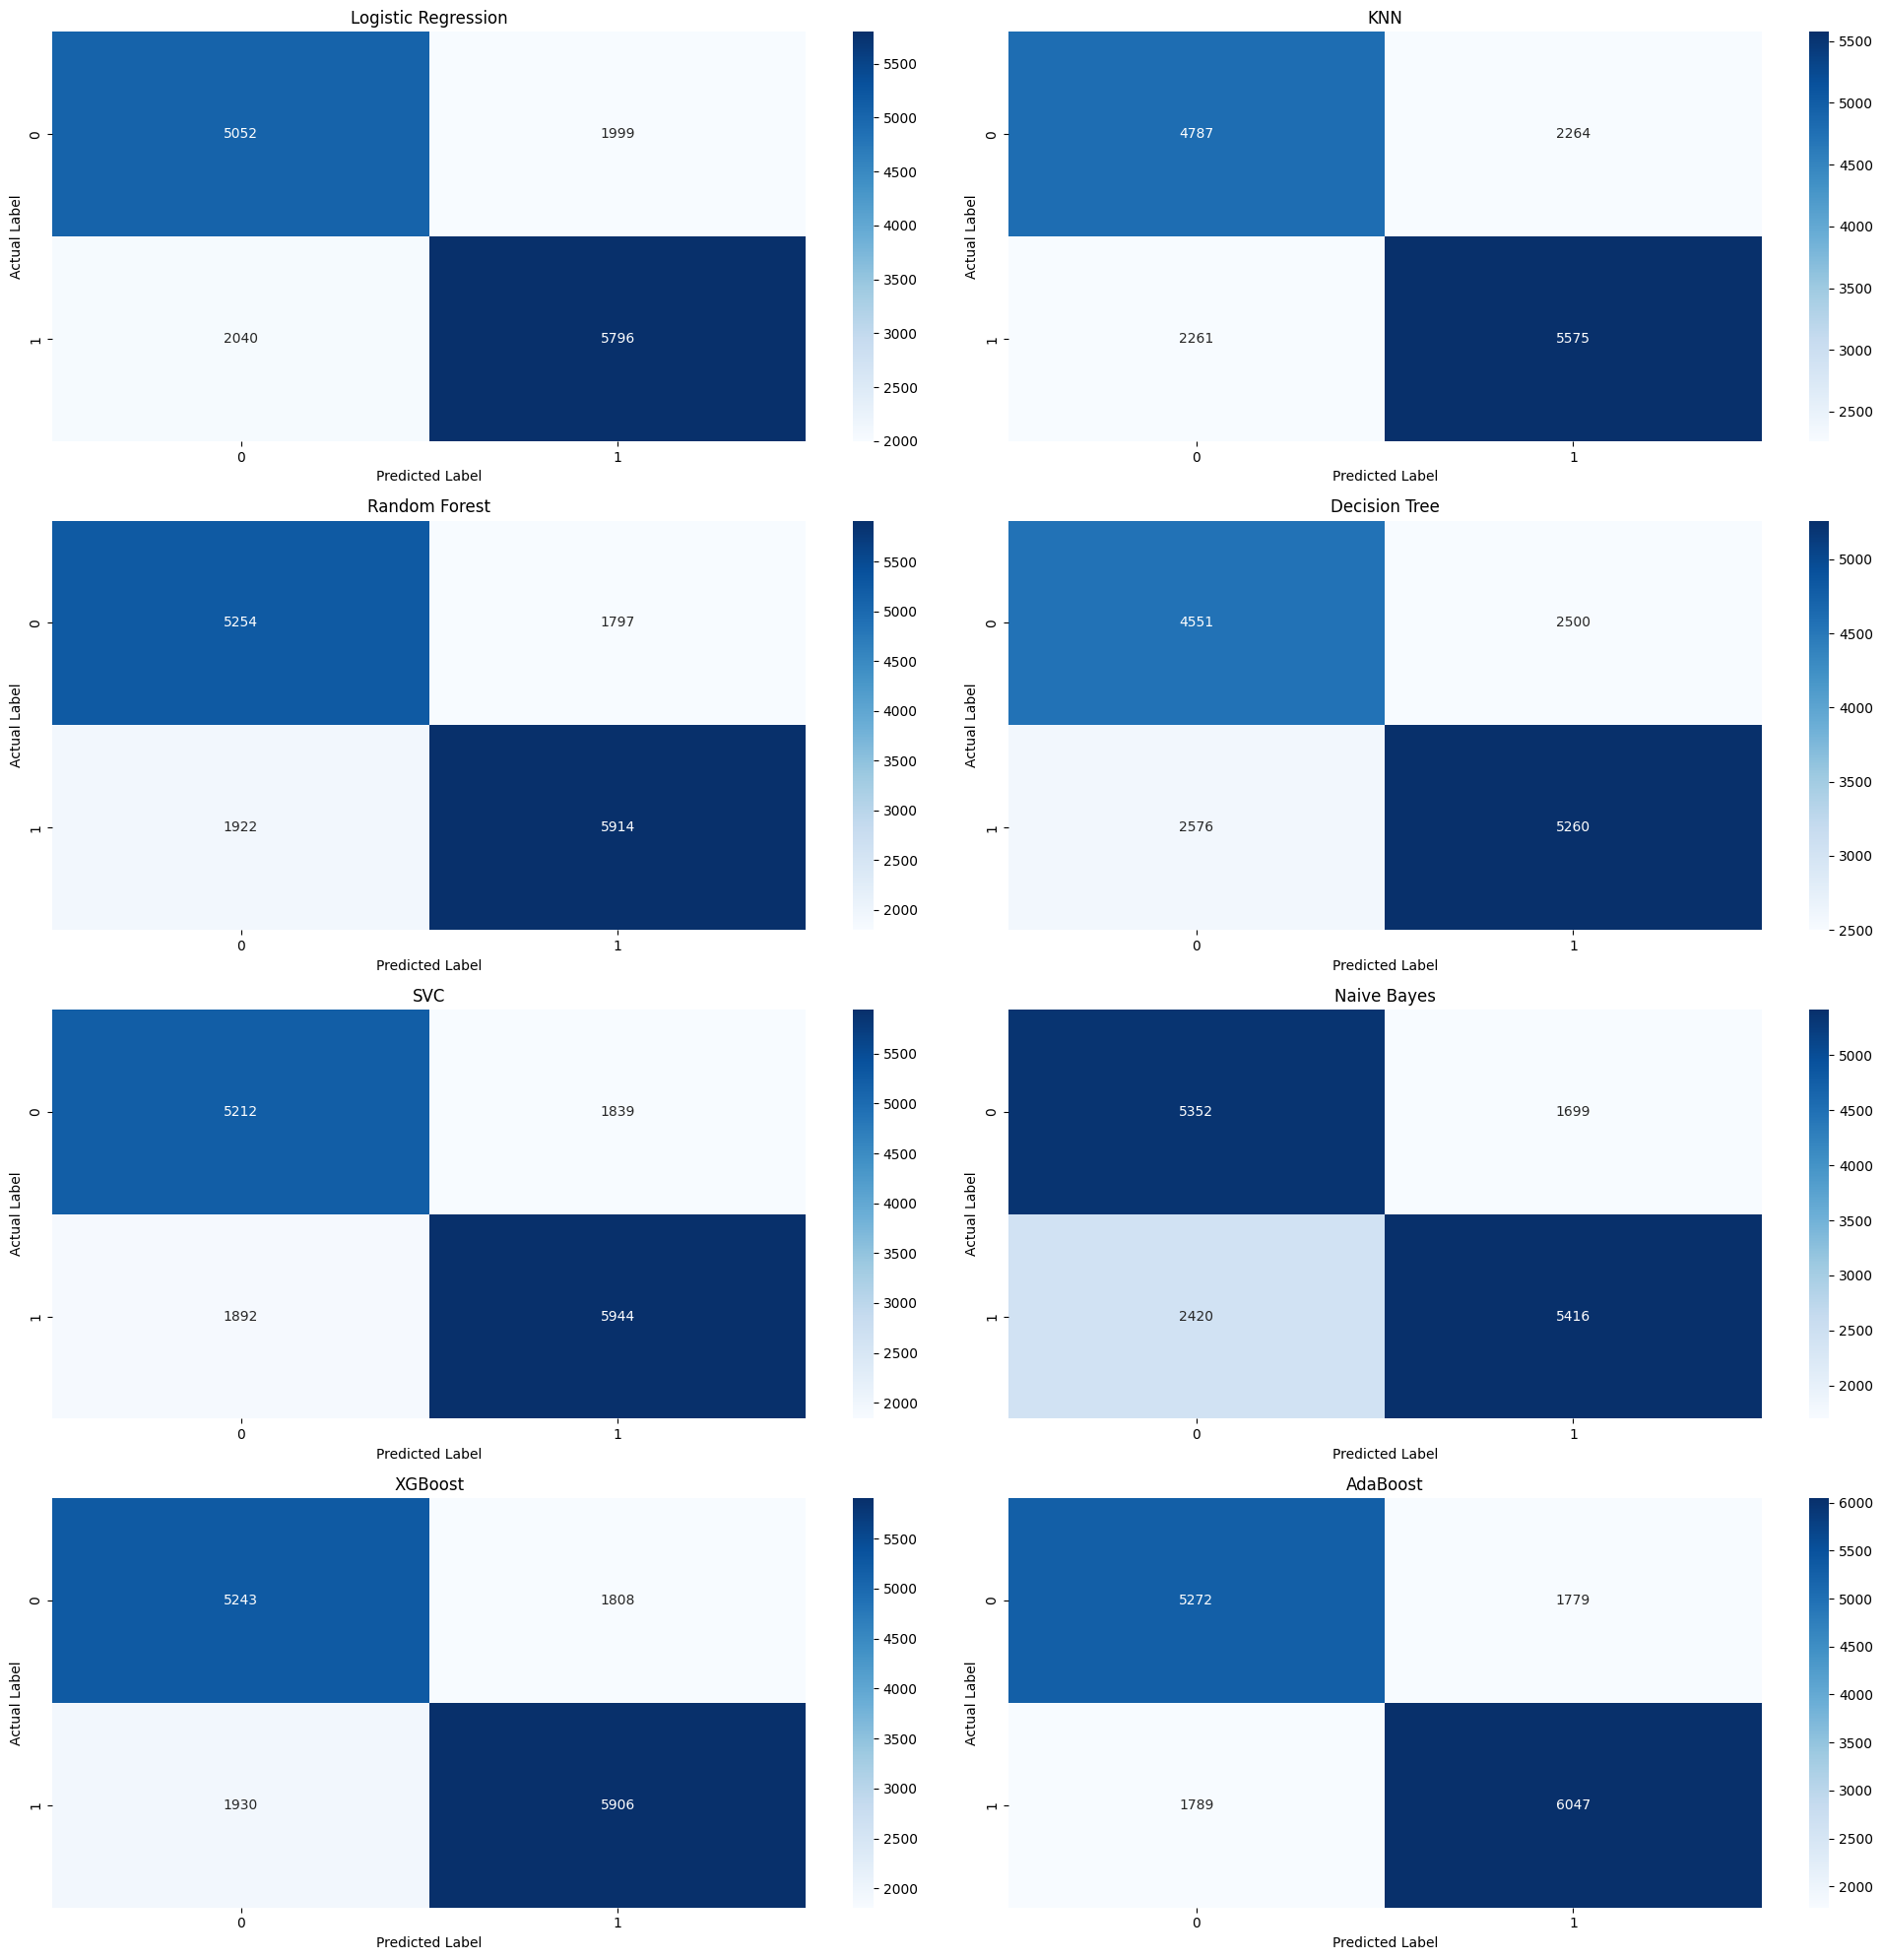

In [ ]:
# Plot all confusion matrix on one plot
plt.figure(figsize=(20, 20))

plt.subplot(4, 2, 1)
sns.heatmap(confusion_matrix(y_test, lg_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Logistic Regression')

plt.subplot(4, 2, 2)
sns.heatmap(confusion_matrix(y_test, knn_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('KNN')

plt.subplot(4, 2, 3)
sns.heatmap(confusion_matrix(y_test, rf_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Random Forest')

plt.subplot(4, 2, 4)
sns.heatmap(confusion_matrix(y_test, dt_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Decision Tree')

plt.subplot(4, 2, 5)
sns.heatmap(confusion_matrix(y_test, svc_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('SVC')

plt.subplot(4, 2, 6)
sns.heatmap(confusion_matrix(y_test, nb_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Naive Bayes')

plt.subplot(4, 2, 7)
sns.heatmap(confusion_matrix(y_test, xgb_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')   
plt.ylabel('Actual Label')
plt.title('XGBoost')

plt.subplot(4, 2, 8)
sns.heatmap(confusion_matrix(y_test, ada_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('AdaBoost')


plt.tight_layout()
plt.show()

## END